# **Global Biodiversity Information Facility (GBIF) Dataset Analysis**  
This pipeline is used to retrive specific datasets from GBIF through it's API using rgbif package in R.

### **Loading R packages and libraries**

In [ ]:
requiredPackages = c("rgbif","tidyverse", "raster", "sys")
cat("\nChecking if needed packages are installed... 'rgbif' and 
'tidyverse'. \nIncase of errors, install each individually and 
troubleshoot any errors that may occur")
for(p in requiredPackages)
    if(p %in% rownames(installed.packages()) == FALSE) {
        install.packages(p)
    } else {
        cat("\nExcellent", p, " already installed. loading", p, "...")
        suppressMessages(library(p, character.only = T))
    }
    cat("\nDone...\n")

### **Setting needed variables**

In [238]:
output_dir="/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif"
GBIF_USER="kibet"
GBIF_EMAIL="kibet.gilbert@ymail.com"
GBIF_PWD="@Kybet"
search_name="Tebanidae"
search_taxon="genus"
#taxonkey="taxonkey"

### **searching database for keys**

In [239]:
key_df <- name_backbone( name = search_name, paste(search_taxon,"=", search_name, sep=" "), 
                      rank = NULL)
key <- key_df$usageKey
key_df
key

usageKey scientificName            canonicalName rank  status   confidence
1 1626510  Bactrocera Macquart, 1835 Bactrocera    GENUS ACCEPTED 90        
  matchType kingdom  phylum     order   family      genus      kingdomKey
1 EXACT     Animalia Arthropoda Diptera Tephritidae Bactrocera 1         
  phylumKey classKey orderKey familyKey genusKey synonym class  
1 54        216      811      3520      1626510  FALSE   Insecta

[1] 1626510

In [240]:
key <- name_backbone( name = search_name, rank = NULL, kingdom = NULL,
                      phylum = NULL, class = NULL, order = NULL,
                      family = NULL, genus = search_name)$genusKey
key
#key1 <- name_backbone( name = "Phlebotomus", rank = NULL, kingdom = NULL,
#                      phylum = NULL, class = NULL, order = NULL,
#                      family = NULL, genus = "Phlebotomus")$genusKey
#key1

[1] 1626510

### **Searching the database for occurence data**

In [66]:
search <- occ_search(taxonKey = key, return = "all")
search


Records found [36013] 
Records returned [500] 
No. unique hierarchies [20] 
No. media records [500] 
No. facets [0] 
Args [limit=500, offset=0, taxonKey=1626510, fields=all] 
# A tibble: 500 x 122
   key   scientificName decimalLatitude decimalLongitude issues datasetKey
   <chr> <chr>                    <dbl>            <dbl> <chr>  <chr>     
 1 2557… Bactrocera tr…           -31.4         153.     "cdro… 50c9509d-…
 2 2563… Bactrocera ol…            38.9           0.0121 "cdro… 50c9509d-…
 3 2574… Bactrocera ol…            43.6           3.86   "cdro… 50c9509d-…
 4 2573… Bactrocera ol…            40.4          17.3    "cdro… 50c9509d-…
 5 2423… Bactrocera tr…           -30.5         152.     "cdro… 84a649ce-…
 6 2432… Bactrocera Ma…           -17           145.     ""     e3ce628e-…
 7 2465… Bactrocera do…            13.3         104.     "cdro… 50c9509d-…
 8 2423… Bactrocera ca…           -27.8         153.     "cdro… 84a649ce-…
 9 2269… Bactrocera zo…           -21.4          55.6

### **Setting the download-output directory**

In [241]:
setwd(output_dir)
dir.create(file.path(paste(search_name,"-",
                           key, sep = "")))
output_file_dir=paste(output_dir,"/", 
                  search_name, "-", key, sep= "" )
output_file_dir

Warning message in dir.create(file.path(paste(search_name, "-", key, sep = ""))):
“'Bactrocera-1626510' already exists”


[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/Bactrocera-1626510"

### **Taking a look at GBIF maps**  
This will dowload a map of the occurence of a particular taxonomic group within a specified region

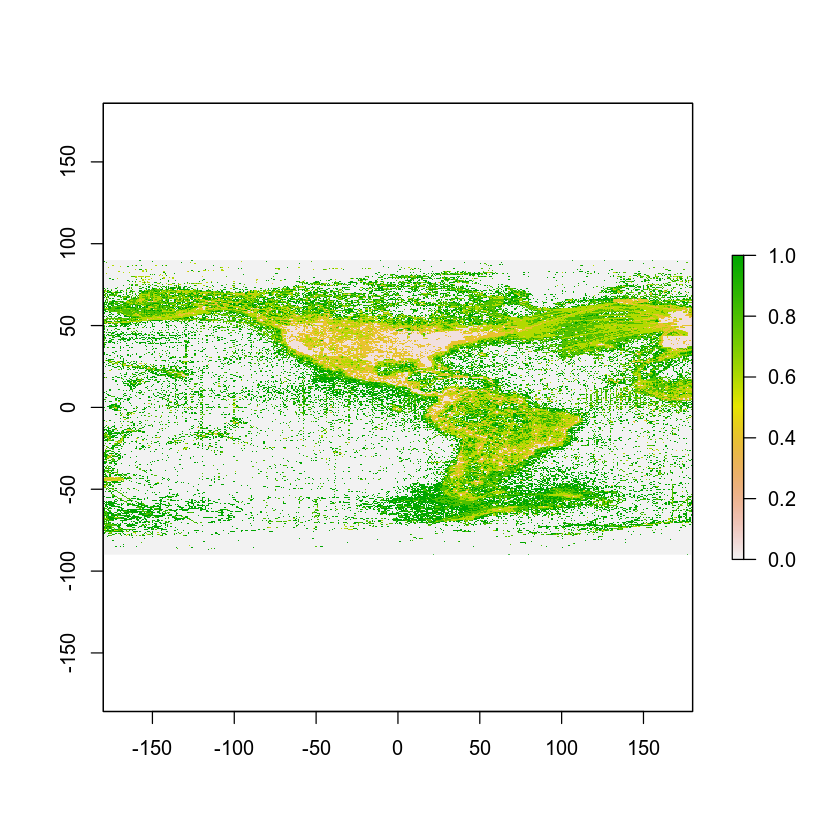

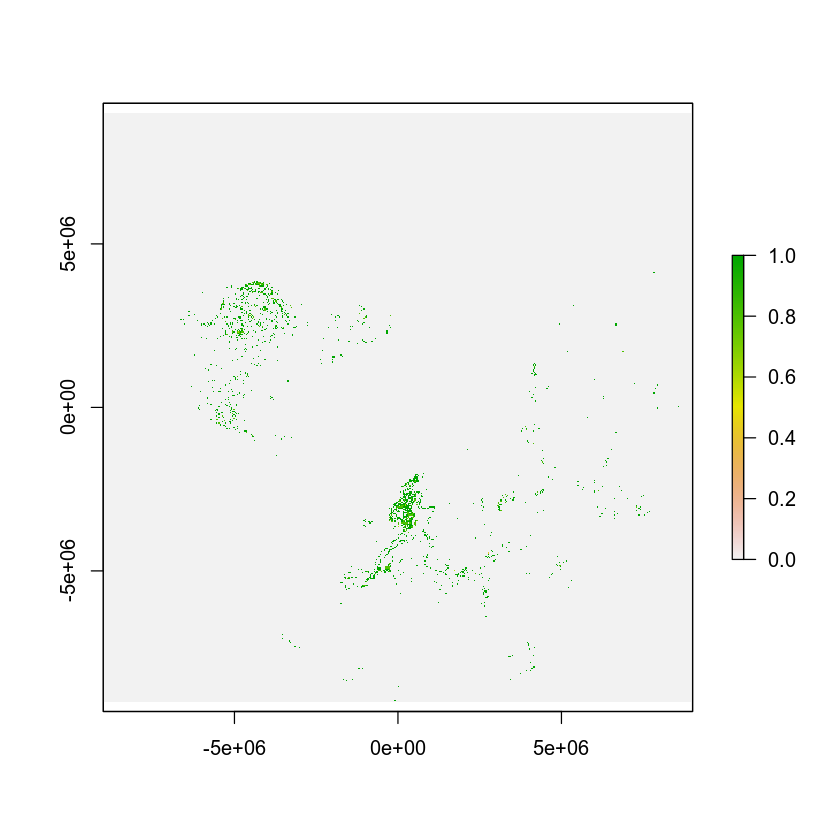

In [18]:
gbif.map <- map_fetch(source = "density", x = 0, y = 0, z = 0, 
                      format = "@2x.png", srs = "EPSG:4326", bin = NULL,
                      hexPerTile = NULL, squareSize = NULL,
                      style = "classic.point", taxonKey = NULL,
                      datasetKey = NULL, country = "KE", publishingOrg = NULL, 
                      publishingCountry = NULL, year = NULL, basisOfRecord = NULL)
plot(gbif.map)
z <- map_fetch(taxonKey = 2480498, year = 2010, srs = "EPSG:3575")
  plot(z)

### **Spin up a download request for GBIF occurrence data**

#### DWCA format

In [22]:
# To avoid regenerating a new dowload key, use the next code to use an already set dowload key
dowload_key <- occ_download(pred("taxonKey",key),
                            format = "DWCA",
                            user = GBIF_USER,
                            pwd = GBIF_PWD,
                            email = GBIF_EMAIL)
dowload.key <- dowload_key[1]
#dowload.key <- "0002478-200127171203522"
dowload.key

[1] "0027055-200221144449610"

#### CSV format

In [32]:
# To avoid regenerating a new dowload key, use the next code to use an already set dowload key
dowload_key1 <- occ_download(pred("taxonKey",key),
                            format = "SIMPLE_CSV",
                            user = GBIF_USER,
                            pwd = GBIF_PWD,
                            email = GBIF_EMAIL)
dowload.key1 <- dowload_key1[1]
#dowload.key <- "0002478-200127171203522"
dowload.key1

[1] "0027058-200221144449610"

In [242]:
dowload.key <- "0027420-200221144449610"
# 0002478-200127171203522

### **Downloading the data from the database.**
wait fro some minutes for the download request to be processed

In [99]:
search$meta$count
wait_time <- search$meta$count / 6000 * 60
cat("\nWill pause operation for", wait_time,
    "as the download is download request is being worked on")
Sys.sleep(wait_time)
cat("\n\tThank you for waiting, we will proceed and download now")

[1] 36013


Will pause operation for 15.55556 as the download is download request is being worked on
	Thank you for waiting, we will proceed and download now

In [235]:
gbif_dowload <- occ_download_get(dowload.key,
                                 path = output_file_dir, 
                                 overwrite = T )
res.zip <- paste(output_file_dir, "/", dowload.key, ".zip", sep = "")
unzip(res.zip, exdir = output_file_dir, overwrite = TRUE)

Download file size: 5.41 MB

On disk at /home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/Bactrocera-1626510/0027055-200221144449610.zip



In [34]:
occ_download_get(dowload.key1, path = output_file_dir, overwrite = T)
res1.zip <- paste(output_file_dir, "/", dowload.key1, ".zip", sep = "")
unzip(res1.zip, exdir = output_file_dir, overwrite = TRUE)

Download file size: 1.46 MB

On disk at /home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/Bactrocera-1626510/0027058-200221144449610.zip



<<gbif downloaded get>>
  Path: /home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/Bactrocera-1626510/0027058-200221144449610.zip
  File size: 1.46 MB

### **N/B: Remember to download either of the files concurrently to ensure that they have the same records**

### **Citations from GBIF**
This includes individual DOIs for the data, citations for every individual dataset included.

In [236]:
cat("\n\tThe citations of the data including individual DOIs for the data, citations for every individual dataset included are as follows::")
gbif_citation(gbif_dowload)


	The citations of the data including individual DOIs for the data, citations for every individual dataset included are as follows::

$download
[1] "GBIF Occurrence Download https://doi.org/10.15468/dl.xvsjz5 Accessed from R via rgbif (https://github.com/ropensci/rgbif) on 2020-03-20"

$datasets
$datasets[[1]]
<<rgbif citation>>
   Citation: van Asch B (2019). FBIP: Genetic diversity of olive insect pests
        and their natural enemies in the Western Cape. South African National
        Biodiversity Institute. Occurrence dataset
        https://doi.org/10.15468/xmksze accessed via GBIF.org on 2020-03-20..
        Accessed from R via rgbif (https://github.com/ropensci/rgbif) on
        2020-03-21
   Rights: This work is licensed under a Creative Commons Attribution (CC-BY)
        4.0 License.

$datasets[[2]]
<<rgbif citation>>
   Citation: The International Barcode of Life Consortium (2016). International
        Barcode of Life project (iBOL). Occurrence dataset
        https://doi.org/10.15468/inygc6 accessed via GBIF.org on 2020-03-20..
        Accessed from R via rgbif (https://github.com/ropensci/rgbif) on
  

## **Loading the dowloaded file to an R session**
Using  tidyverse

#### 1. **The easy SIMPLE_CSV download**

In [ ]:
search_name="Bactrocera"
output_dir<-Sys.glob(paste("/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/gbif/", 
                  search_name,"*", sep=""))
output_dir
setwd(output_dir)
data_files <- Sys.glob("*.csv")
data_files
res.csv <- data_files[which.max(file.mtime(data_files))]
res.csv
gbif_data <- read.delim(res.csv, stringsAsFactors = F, header = T,
                        na.strings = "", quote = "")
nrow(gbif_data)

In [278]:
nrow(gbif_data)

[1] 36011

#### 2. **The DWCA format download, comes as a compressed .zip file.**  
Made up of  
    **a.** A citations.txt file that lists citations of datasets included in the download  
    **b.** A "dataset" directory with .xml files describing all datasets in the download  
    **c.** A metadata.xml file  
    **d.** A meta.xml file  
    **e.** A multimedia.txt file  
    **f.** A occurrence.txt file - The main file with data  
    **g.** A rights.txt file  
    **h.** A verbatim.txt file - Has important data just like f. above  

#### **f. Loading occurrence.txt**

In [279]:
occ.tsv <- paste(output_dir, "/", "occurrence.txt", sep = "")
gbif_occ <- read.delim(occ.tsv, stringsAsFactors = F, header = T,
                       na.strings = "", sep = "\t", quote = "")

In [280]:
nrow(gbif_occ)

[1] 36011

#### **h. Loading verbatim.txt**
NB: Not very important but can be used as an alternative to occurrence.txt. However, use of the later (occurrence.txt) is highly encouraged

In [281]:
verb.tsv <- paste(output_file_dir, "/", "verbatim.txt", sep = "")
gbif_verb <- read.delim(verb.tsv, stringsAsFactors = F, header = T,
                        na.strings = "", quote = "")

In [282]:
nrow(gbif_verb)

[1] 36011

## **Analysing GBIF data based on occurrence.txt and SIMPLE_CSV**  
For GenBank accessesion codes, the `associatedSequences` field in darwincore format serves that purpose  
### 1. First, extract Rows with associated sequences from occurrence.txt

In [283]:
gbif_seq <- subset(gbif_occ, !is.na(associatedSequences))
nrow(gbif_seq)

[1] 9611

In [250]:
str(gbif_seq)

'data.frame':	9611 obs. of  239 variables:
 $ gbifID                             : num  2.47e+09 2.47e+09 2.47e+09 2.47e+09 2.47e+09 ...
 $ abstract                           : logi  NA NA NA NA NA NA ...
 $ accessRights                       : chr  NA NA NA NA ...
 $ accrualMethod                      : logi  NA NA NA NA NA NA ...
 $ accrualPeriodicity                 : logi  NA NA NA NA NA NA ...
 $ accrualPolicy                      : logi  NA NA NA NA NA NA ...
 $ alternative                        : logi  NA NA NA NA NA NA ...
 $ audience                           : logi  NA NA NA NA NA NA ...
 $ available                          : logi  NA NA NA NA NA NA ...
 $ bibliographicCitation              : logi  NA NA NA NA NA NA ...
 $ conformsTo                         : logi  NA NA NA NA NA NA ...
 $ contributor                        : logi  NA NA NA NA NA NA ...
 $ coverage                           : logi  NA NA NA NA NA NA ...
 $ created                            : chr  NA NA NA 

In [264]:
gbif_seq$associatedSequences

[1] "BACTR007-17"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
   [2] "BACTR004-17"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
   [3] "BACTR011-17"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
   [4] "BACTR013-17"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
   [5] "Not deposited on GenBank"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
   [6] "Not deposited on GenBank"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
   [7] "Not deposited in GenBank"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
   [8] "Not deposited in GenBank"                                                                                                                                                    

### 2. Second, extract records from SIMPLE_CSV file with associatedSequences based on filtered gbifIDs above

In [284]:
gbif_data_seq <- subset(gbif_data, gbifID %in% gbif_seq$gbifID)

In [254]:
str(gbif_data_seq)

'data.frame':	9611 obs. of  50 variables:
 $ gbifID                          : num  2.47e+09 2.47e+09 2.47e+09 2.47e+09 2.47e+09 ...
 $ datasetKey                      : chr  "0081d6b8-9c38-49ee-8355-f5a118cc0876" "0081d6b8-9c38-49ee-8355-f5a118cc0876" "0081d6b8-9c38-49ee-8355-f5a118cc0876" "0081d6b8-9c38-49ee-8355-f5a118cc0876" ...
 $ occurrenceID                    : chr  "urn:catalog:SU:BO022" "urn:catalog:SU:BO007" "urn:catalog:SU:BO051" "urn:catalog:SU:BO061" ...
 $ kingdom                         : chr  "Animalia" "Animalia" "Animalia" "Animalia" ...
 $ phylum                          : chr  "Arthropoda" "Arthropoda" "Arthropoda" "Arthropoda" ...
 $ class                           : chr  "Insecta" "Insecta" "Insecta" "Insecta" ...
 $ order                           : chr  "Diptera" "Diptera" "Diptera" "Diptera" ...
 $ family                          : chr  "Tephritidae" "Tephritidae" "Tephritidae" "Tephritidae" ...
 $ genus                           : chr  "Bactrocera" "Bactrocer

In [256]:
gbif_data_seq$gbifID

[1] 2469051218 2469051206 2469051201 2469051194 2469051188 2469051187
   [7] 2469051165 2469051152 2469051151 2469051147 2469051145 2469051140
  [13] 2469051139 2469051135 2469051133 2469051122 2469051112 2469051102
  [19] 2469051084 2469051060 2469051057 2469051054 2469051052 2469051051
  [25] 2469051042 2469051041 2469051037 2469051035 2469051031 2469051030
  [31] 2469051028 2469051026 2469051022 2469051020 2469051019 2469051017
  [37] 2469051015 2469051004 2469051001 2469050997 2469050993 2469050991
  [43] 2469050987 2469050983 2469050978 2469050976 2469050971 2469050968
  [49] 2469050965 2469050963 2469050959 2469050948 2469050942 2469050941
  [55] 2469050939 2469050934 2469050933 2469050929 2469050928 2469050921
  [61] 2469050920 2469050916 2469050914 2469050913 2469050907 2469050906
  [67] 2469050903 2311245817 2311242617 2311240287 2311239362 2311239350
  [73] 2311238981 2311237526 2311234359 2311233192 2311231227 2311229280
  [79] 2311228766 2311228040 2311226779 2311226426 2311223687 2311221171
  [85] 2311221009 2311218421 2311215161 2311215151 2311213011 2311212379
  [91] 2311212283 2311209440 2311207453 2311206494 2311206384 2311206133
  [97] 2311205330 2311204612 2311201679 2311201514 2311199708 2311199582
 [103] 2311198357 2311193246 2311192946 2311192444 2311189490 2311188960
 [109] 2311185836 2311184212 2311182917 2311179052 2311178796 2311178172
 [115] 2311178106 2311176818 2311175746 2311175688 2311174583 2311174307
 [121] 2311171657 2311171116 2311170756 2311166601 2311164036 2311162403
 [127] 2311162003 2311162001 2311161459 2311159510 2311158108 2311155976
 [133] 2311155833 2311151489 2311151066 2311150513 2311149279 2311148591
 [139] 2311148398 2311148061 2311147101 2311141187 2311140501 2311136387
 [145] 2311135767 2311134868 2311132850 2311132737 2311132684 2311132198
 [151] 2311131600 2311130604 2311130109 2311130087 2311130074 2311129389
 [157] 2311129032 2311127761 2311127664 2311127318 2311127105 2311121438
 [163] 2311120381 2311119458 2311118720 2311118599 2311116037 2311116003
 [169] 2311115999 2311115961 2311115771 2311115304 2311114851 2311111350
 [175] 2311110452 2311108149 2311106480 2311102728 2311102584 2311098069
 [181] 2311096669 2311095232 2311094916 2311094898 2311094617 2311094453
 [187] 2311094413 2311094369 2311091817 2311087652 2311087088 2311087039
 [193] 2311086969 2311086926 2311086658 2311085218 2311085094 2311085000
 [199] 2311084900 2311084831 2311084537 2311084232 2311084205 2311083894
 [205] 2311081155 2311080111 2311079792 2311078638 2311077083 2311076654
 [211] 2311074012 2311073581 2311073424 2311072583 2311071034 2311070732
 [217] 2311069537 2311068151 2311066870 2311066781 2311066620 2311066526
 [223] 2311066169 2311065863 2311065228 2311056649 2311054022 2311051329
 [229] 2311051124 2311046578 2311045620 2311045494 2311044967 2311044923
 [235] 2311043259 2311042627 2311042294 2311041416 2311041069 2311040419
 [241] 2311039612 2311037755 2311035628 2311035578 2311032757 2311032154
 [247] 2311032083 2311032076 2311031155 2311028106 2311027688 2311023413
 [253] 2311022622 2311021847 2311015284 2311013692 2311013582 2311012783
 [259] 2311011480 2311010766 2311010286 2311009779 2311008484 2311007848
 [265] 2311005110 2311003943 2311002503 2311002240 2311002186 2311001552
 [271] 2311001515 2311000743 2310999223 2310998077 2310996429 2310994320
 [277] 2310991056 2310988321 2310987197 2310984988 2310984596 2310984423
 [283] 2310983816 2310983736 2310983284 2310982206 2310981378 2310980429
 [289] 2310977730 2310977451 2310976185 2310974578 2310974093 2310973330
 [295] 2310972624 2310972278 2310971287 2310968682 2310967393 2310966784
 [301] 2310963464 2310963325 2310963020 2310962745 2310962163 2310958398
 [307] 2310957475 2310957194 2310957144 2310957038 2310956083 2310953033
 [313] 2310951861 2310951617 2310951350 2310946788 2310946023 2310945971
 [319] 2310944688 2310944618 2310944401 2310943678 2310942893 2310942590
 [325] 2310942001 2310940524 2310939012 2310936639 2310935251

### 3. Merge The two dataframes avoiding any dublicate columns

In [285]:
gbif_data.seq <- merge(gbif_data_seq, gbif_seq, 
                       sort = T, all.y=T)


In [ ]:
dim(gbif_data.seq)
names(gbif_data.seq)

In [178]:
?merge

merge                package:data.table                R Documentation

_M_e_r_g_e _t_w_o _d_a_t_a._t_a_b_l_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Fast merge of two ‘data.table’s. The ‘data.table’ method behaves
     very similarly to that of ‘data.frame’s except that, by default,
     it attempts to merge

        • at first based on the shared key columns, and if there are
          none,

        • then based on key columns of the first argument ‘x’, and if
          there are none,

        • then based on the common columns between the two
          ‘data.table’s.

     Set the ‘by’, or ‘by.x’ and ‘by.y’ arguments explicitly to
     override this default.

_U_s_a_g_e:

     ## S3 method for class 'data.table'
     merge(x, y, by = NULL, by.x = NULL, by.y = NULL, all = FALSE,
     all.x = all, all.y = all, sort = TRUE, suffixes = c(".x", ".y"), no.dups = TRUE,
     allow.cartesian=getOption("datatable.allow.cartesian"),  # default FALSE
     ...)
     
_A_r_g_u_m_e_n_t_s:

    x, y: ‘data table’s. ‘y’ is coerced to a ‘data.table’ if it isn't
          one already.

      by: A vector of shared column names in ‘x’ and ‘y’ to merge on.
          This defaults to the shared key columns between the two
          tables. If ‘y’ has no key columns, this defaults to the key
          of ‘x’.

by.x, by.y: Vectors of column names in ‘x’ and ‘y’ to merge on.

     all: logical; ‘all = TRUE’ is shorthand to save setting both
          ‘all.x = TRUE’ and ‘all.y = TRUE’.

   all.x: logical; if ‘TRUE’, then extra rows will be added to the
          output, one for each row in ‘x’ that has no matching row in
          ‘y’. These rows will have 'NA's in those columns that are
          usually filled with values from ‘y’.  The default is ‘FALSE’,
          so that only rows with data from both ‘x’ and ‘y’ are
          included in the output.

   all.y: logical; analogous to ‘all.x’ above.

    sort: logical. If ‘TRUE’ (default), the merged ‘data.table’ is
          sorted by setting the key to the ‘by / by.x’ columns. If
          ‘FALSE’, the result is not sorted.

suffixes: A ‘character(2)’ specifying the suffixes to be used for
          making non-‘by’ column names unique. The suffix behaviour
          works in a similar fashion as the ‘merge.data.frame’ method
          does.

 no.dups: logical indicating that ‘suffixes’ are also appended to
          non-‘by.y’ column names in ‘y’ when they have the same column
          name as any ‘by.x’.

allow.cartesian: See ‘allow.cartesian’ in ‘[.data.table’.

     ...: Not used at this time.

_D_e_t_a_i_l_s:

     ‘merge’ is a generic function in base R. It dispatches to either
     the ‘merge.data.frame’ method or ‘merge.data.table’ method
     depending on the class of its first argument. Note that, unlike
     ‘SQL’, ‘NA’ is matched against ‘NA’ (and ‘NaN’ against ‘NaN’)
     while merging.

     In versions ‘<= v1.9.4’, if the specified columns in ‘by’ were not
     the key (or head of the key) of ‘x’ or ‘y’, then a ‘copy’ is first
     re-keyed prior to performing the merge. This was less performant
     as well as memory inefficient. The concept of secondary keys
     (implemented in ‘v1.9.4’) was used to overcome this limitation
     from ‘v1.9.6’+. No deep copies are made any more, thereby
     improving performance and memory efficiency. Also, there is better
     control for providing the columns to merge on with the help of the
     newly implemented ‘by.x’ and ‘by.y’ arguments.

     For a more ‘data.table’-centric way of merging two ‘data.table’s,
     see ‘[.data.table’; e.g., ‘x[y, ...]’. See FAQ 1.11 for a detailed
     comparison of ‘merge’ and ‘x[y, ...]’.

     If any column names provided to ‘by.x’ also occur in ‘names(y)’
     but not in ‘by.y’, then this ‘data.table’ method will add the
     ‘suffixes’ to those column names. As of R v3.4.3, the ‘data.frame’
     method will not (leading to duplicate column names in the resu

### 4. Creating a dataframe of gbifID, assocuiatedSequences and adding six new columns to it:  BOLDprocessiduri, BOLDprocessid, BOLDclusteruri, BOLDcluster, GenBankuri, GenBank

In [287]:
dplyr::select(gbif_data.seq, gbifID, associatedSequences) %>% 
mutate(BOLDprocessiduri = NA_character_, BOLDprocessid = NA_character_,
       BOLDclusteruri = NA_character_, BOLDcluster = NA_character_, 
       GenBankuri = NA_character_, GenBank = NA_character_) -> genbank

In [260]:
str(genbank)
genbank

'data.frame':	9611 obs. of  8 variables:
 $ gbifID             : num  1.41e+09 1.41e+09 1.41e+09 1.41e+09 1.41e+09 ...
 $ associatedSequences: chr  NA NA NA NA ...
 $ BOLDprocessiduri   : chr  NA NA NA NA ...
 $ BOLDprocessid      : chr  NA NA NA NA ...
 $ BOLDclusteruri     : chr  NA NA NA NA ...
 $ BOLDcluster        : chr  NA NA NA NA ...
 $ GenBankuri         : chr  NA NA NA NA ...
 $ GenBank            : chr  NA NA NA NA ...


gbifID     associatedSequences      BOLDprocessiduri BOLDprocessid
1    1413836145 NA                       NA               NA           
2    1413836183 NA                       NA               NA           
3    1413836189 NA                       NA               NA           
4    1413862478 NA                       NA               NA           
5    1413862480 NA                       NA               NA           
6    1413862481 NA                       NA               NA           
7    1413862483 NA                       NA               NA           
8    1413862489 NA                       NA               NA           
9    1414843589 NA                       NA               NA           
10   1414843697 NA                       NA               NA           
11   1414843729 NA                       NA               NA           
12   1414843807 NA                       NA               NA           
13   1414843847 NA                       NA               NA           
14   1415642059 NA                       NA               NA           
15   1415642071 NA                       NA               NA           
16   1415642075 NA                       NA               NA           
17   1415642087 NA                       NA               NA           
18   1415642090 NA                       NA               NA           
19   1415642096 NA                       NA               NA           
20   1415642102 NA                       NA               NA           
21   1415642113 NA                       NA               NA           
22   1415642120 NA                       NA               NA           
23   1415642126 NA                       NA               NA           
24   1415642152 NA                       NA               NA           
25   1415781298 NA                       NA               NA           
26   1415781341 NA                       NA               NA           
27   1416045288 NA                       NA               NA           
28   1416045301 NA                       NA               NA           
29   1416045302 NA                       NA               NA           
30   1416045303 NA                       NA               NA           
⋮    ⋮          ⋮                        ⋮                ⋮            
9582 2469051030 BACTR019-17              NA               NA           
9583 2469051031 Not deposited in GenBank NA               NA           
9584 2469051035 Not deposited in GenBank NA               NA           
9585 2469051037 BACTR001-17              NA               NA           
9586 2469051041 BACTR015-17              NA               NA           
9587 2469051042 Not deposited in GenBank NA               NA           
9588 2469051051 Not deposited in GenBank NA               NA           
9589 2469051052 Not deposited on GenBank NA               NA           
9590 2469051054 BACTR016-17              NA               NA           
9591 2469051057 Not deposited in GenBank NA               NA           
9592 2469051060 BACTR006-17              NA               NA           
9593 2469051084 Not deposited in GenBank NA               NA           
9594 2469051102 BACTR010-17              NA               NA           
9595 2469051112 BACTR005-17              NA               NA           
9596 2469051122 Not deposited in GenBank NA               NA           
9597 2469051133 BACTR008-17              NA               NA           
9598 2469051135 Not deposited in GenBank NA               NA           
9599 2469051139 BACTR014-17              NA               NA           
9600 2469051140 Not deposited in GenBank NA               NA           
9601 2469051145 Not deposited in GenBank NA               NA           
9602 2469051147 Not deposited in GenBank NA               NA           
9603 2469051151 Not deposited on GenBank NA               NA           
9604 2469051152 Not deposited in GenBank NA               NA           
9605 2469051165 Not deposited in GenBank NA  

### 5. Adding values to the BOLDprocessiduri, BOLDclusteruri, GenBankuri columns of the genbank dataframe

In [295]:
BOLD_process <- "processid=|^[:upper:]{4,6}[:digit:]{1,6}-[:digit:]{2}$"
BOLD_cluster <- "clusteruri="
genbank_acce <- "nuccore|^[:upper:]{1,2}_?[:digit:]{5,8}\\.?[:digit:]?$|GenBank"
n <- 1
while(n <= nrow(genbank)) {
    for(i in unlist(strsplit(as.character(genbank$associatedSequences[n]),'\\|'))) {
        #cat(i)
        if (stringr::str_detect(i, BOLD_process)) {
            genbank[n, "BOLDprocessiduri"] <- i
        } else if (stringr::str_detect(i, BOLD_cluster)) {
            genbank[n, "BOLDclusteruri"] <- i
        } else if (stringr::str_detect(i, genbank_acce)) {
            genbank[n, "GenBankuri"] <- i
        } else {
            cat("\n\nThe value in ", n," position of genbank$associatedSequences",
                " does not fit any pattern or is empty \n\t>>", i)
            genbank$BOLDprocessiduri[n] <- NA_character_
            genbank$BOLDclusteruri[n] <- NA_character_
            genbank$GenBankuri[n] <- NA_character_
        }
    }
    n <- n+1
}
#df$class <- as.integer(grepl('comp', df$target_id))
#"Error in if (condition) { : missing value where TRUE/FALSE needed " means that one i== NA in that position.

In [149]:
?strsplit

tstrsplit              package:data.table              R Documentation

_s_t_r_s_p_l_i_t _a_n_d _t_r_a_n_s_p_o_s_e _t_h_e _r_e_s_u_l_t_i_n_g _l_i_s_t _e_f_f_i_c_i_e_n_t_l_y

_D_e_s_c_r_i_p_t_i_o_n:

     This is equivalent to ‘transpose(strsplit(...))’. This is a
     convenient wrapper function to split a column using ‘strsplit’ and
     assign the transposed result to individual columns. See examples.

_U_s_a_g_e:

     tstrsplit(x, ..., fill=NA, type.convert=FALSE, keep, names=FALSE)
     
_A_r_g_u_m_e_n_t_s:

       x: The vector to split (and transpose).

     ...: All the arguments to be passed to ‘strsplit’.

    fill: Default is ‘NA’. It is used to fill shorter list elements so
          as to return each element of the transposed result of equal
          lengths.

type.convert: ‘TRUE’ calls ‘type.convert’ with ‘as.is=TRUE’ on the
          columns.

    keep: Specify indices corresponding to just those list elements to
          retain in the transposed result. Default is to return all.

   names: ‘TRUE’ auto names the list with ‘V1, V2’ etc. Default
          (‘FALSE’) is to return an unnamed list.

_D_e_t_a_i_l_s:

     It internally calls ‘strsplit’ first, and then ‘transpose’ on the
     result.

     ‘names’ argument can be used to return an auto named list,
     although this argument does not have any effect when used with
     ‘:=’, which requires names to be provided explicitly. It might be
     useful in other scenarios.

_V_a_l_u_e:

     A transposed list after splitting by the pattern provided.

_S_e_e _A_l_s_o:

     ‘data.table’, ‘transpose’

_E_x_a_m_p_l_e_s:

     x = c("abcde", "ghij", "klmnopq")
     strsplit(x, "", fixed=TRUE)
     tstrsplit(x, "", fixed=TRUE)
     tstrsplit(x, "", fixed=TRUE, fill="<NA>")
     
     # using keep to return just 1,3,5
     tstrsplit(x, "", fixed=TRUE, keep=c(1,3,5))
     
     # names argument
     tstrsplit(x, "", fixed=TRUE, keep=c(1,3,5), names=LETTERS[1:3])
     
     DT = data.table(x=c("A/B", "A", "B"), y=1:3)
     DT[, c("c1") := tstrsplit(x, "/", fixed=TRUE, keep=1L)][]
     DT[, c("c1", "c2") := tstrsplit(x, "/", fixed=TRUE)][]

In [296]:
str(genbank)
genbank

'data.frame':	9611 obs. of  8 variables:
 $ gbifID             : num  1.41e+09 1.41e+09 1.41e+09 1.41e+09 1.41e+09 ...
 $ associatedSequences: chr  "https://www.ncbi.nlm.nih.gov/nuccore/GU675543-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU675556-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/HM421639-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU682022-SUPPRESSED" ...
 $ BOLDprocessiduri   : chr  NA NA NA NA ...
 $ BOLDprocessid      : chr  NA NA NA NA ...
 $ BOLDclusteruri     : chr  NA NA NA NA ...
 $ BOLDcluster        : chr  NA NA NA NA ...
 $ GenBankuri         : chr  "https://www.ncbi.nlm.nih.gov/nuccore/GU675543-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU675556-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/HM421639-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU682022-SUPPRESSED" ...
 $ GenBank            : chr  "GU675543" "GU675556" "HM421639" "GU682022" ...


gbifID     associatedSequences                                     
1    1413836145 https://www.ncbi.nlm.nih.gov/nuccore/GU675543-SUPPRESSED
2    1413836183 https://www.ncbi.nlm.nih.gov/nuccore/GU675556-SUPPRESSED
3    1413836189 https://www.ncbi.nlm.nih.gov/nuccore/HM421639-SUPPRESSED
4    1413862478 https://www.ncbi.nlm.nih.gov/nuccore/GU682022-SUPPRESSED
5    1413862480 https://www.ncbi.nlm.nih.gov/nuccore/GU682019-SUPPRESSED
6    1413862481 https://www.ncbi.nlm.nih.gov/nuccore/GU682021-SUPPRESSED
7    1413862483 https://www.ncbi.nlm.nih.gov/nuccore/GU682020-SUPPRESSED
8    1413862489 https://www.ncbi.nlm.nih.gov/nuccore/GU682017-SUPPRESSED
9    1414843589 https://www.ncbi.nlm.nih.gov/nuccore/HQ945437-SUPPRESSED
10   1414843697 https://www.ncbi.nlm.nih.gov/nuccore/HM909614-SUPPRESSED
11   1414843729 https://www.ncbi.nlm.nih.gov/nuccore/HQ561077-SUPPRESSED
12   1414843807 https://www.ncbi.nlm.nih.gov/nuccore/JN266588-SUPPRESSED
13   1414843847 https://www.ncbi.nlm.nih.gov/nuccore/JN266587-SUPPRESSED
14   1415642059 https://www.ncbi.nlm.nih.gov/nuccore/HQ962585-SUPPRESSED
15   1415642071 https://www.ncbi.nlm.nih.gov/nuccore/HQ962586-SUPPRESSED
16   1415642075 https://www.ncbi.nlm.nih.gov/nuccore/HQ962592-SUPPRESSED
17   1415642087 https://www.ncbi.nlm.nih.gov/nuccore/HQ962588-SUPPRESSED
18   1415642090 https://www.ncbi.nlm.nih.gov/nuccore/HQ962590-SUPPRESSED
19   1415642096 https://www.ncbi.nlm.nih.gov/nuccore/HQ962589-SUPPRESSED
20   1415642102 https://www.ncbi.nlm.nih.gov/nuccore/HQ962591-SUPPRESSED
21   1415642113 https://www.ncbi.nlm.nih.gov/nuccore/HQ962587-SUPPRESSED
22   1415642120 https://www.ncbi.nlm.nih.gov/nuccore/HQ962593-SUPPRESSED
23   1415642126 https://www.ncbi.nlm.nih.gov/nuccore/HQ962594-SUPPRESSED
24   1415642152 https://www.ncbi.nlm.nih.gov/nuccore/HQ962584-SUPPRESSED
25   1415781298 https://www.ncbi.nlm.nih.gov/nuccore/KY829593           
26   1415781341 https://www.ncbi.nlm.nih.gov/nuccore/KY845462           
27   1416045288 https://www.ncbi.nlm.nih.gov/nuccore/JF880065           
28   1416045301 https://www.ncbi.nlm.nih.gov/nuccore/JF880079           
29   1416045302 https://www.ncbi.nlm.nih.gov/nuccore/JF880042           
30   1416045303 https://www.ncbi.nlm.nih.gov/nuccore/JF880068           
⋮    ⋮          ⋮                                                       
9582 2469051030 BACTR019-17                                             
9583 2469051031 Not deposited in GenBank                                
9584 2469051035 Not deposited in GenBank                                
9585 2469051037 BACTR001-17                                             
9586 2469051041 BACTR015-17                                             
9587 2469051042 Not deposited in GenBank                                
9588 2469051051 Not deposited in GenBank                                
9589 2469051052 Not deposited on GenBank                                
9590 2469051054 BACTR016-17                                             
9591 2469051057 Not deposited in GenBank                                
9592 2469051060 BACTR006-17                                             
9593 2469051084 Not deposited in GenBank                                
9594 2469051102 BACTR010-17                                             
9595 2469051112 BACTR005-17                                             
9596 2469051122 Not deposited in GenBank                                
9597 2469051133 BACTR008-17                                             
9598 2469051135 Not deposited in GenBank                                
9599 2469051139 BACTR014-17                                             
9600 2469051140 Not deposited in GenBank                                
9601 2469051145 Not deposited in GenBank                                
9602 2469051147 Not deposited in GenBank                                
9603 2469051151 Not deposited on GenBank                                
9604 2469051152 Not deposited in GenBank                       

Test code for the above code

In [151]:
### Test datasets --- row numbers (n) and their respective (genbank$associatedSequences[n])
# 9 'http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFG061-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9317'
# 11 'http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFI851-15|http://bins.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAP4581|http://www.ncbi.nlm.nih.gov/nuccore/'
# 45 'http://www.boldsystems.org/index.php/Public_RecordView?processid=RRMFE614-15'
# 93 'https://www.ncbi.nlm.nih.gov/nuccore/HM433828-SUPPRESSED'
# 100 'https://www.ncbi.nlm.nih.gov/nuccore/GU694814-SUPPRESSED'
# 9487 'GenBank: KP112598.1 https://www.ncbi.nlm.nih.gov/nuccore/807201818'
# 9488 'GenBank: KP112599.1 https://www.ncbi.nlm.nih.gov/nuccore/807201820'
# 9489 'GenBank: KP112608.1 https://www.ncbi.nlm.nih.gov/nuccore/807201838'
# 20376 'http://www.boldsystems.org/index.php/Public_RecordView?processid=SSEIA6580-13| https://www.ncbi.nlm.nih.gov/nuccore/630[0n]| http://v4.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9320'
# 20469 'http://www.boldsystems.org/index.php/Public_RecordView?processid=CNGLE385-13| https://www.ncbi.nlm.nih.gov/nuccore/629[0n]| http://v4.boldsystems.org/index.php/Public_BarcodeCluster?clusteruri=BOLD:AAF9320'
# 22147 'https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041 | https://www.ncbi.nlm.nih.gov/nuccore/NC_028041'
# 23808 'KR987757'
# 23809 'KM937463'
# 23810 'KT118178'
n <- 22147
y <- n

BOLD_process <- "processid="
BOLD_cluster <- "clusteruri="
genbank_acce <- "nuccore|^[:upper:]{1,2}_?[:digit:]{5,8}\\.?[:digit:]?$"

genbank$associatedSequences[n]
while(n <= y){
    for(x in unlist(strsplit(as.character(genbank$associatedSequences[n]),'\\|'))) {
        cat(i)
        if(stringr::str_detect(x, BOLD_process)) {
            cat(paste("'", BOLD_process, "' is Found at:\n", n,"as", x, "\n\n" ))
        } else if(stringr::str_detect(x, BOLD_cluster)) {
            cat(paste("'", BOLD_cluster, "' is Found at:\n", n, "as",x, "\n\n" ))
        } else if(stringr::str_detect(x, genbank_acce)) {
            cat(paste("'", genbank_acce, "' is Found at:\n", n, "as",x, "\n\n" ))
        } else {
            print("\nNo match found")
        }
    }
    n <- n+1
}

[1] NA

NA

ERROR: Error in if (stringr::str_detect(x, BOLD_process)) {: missing value where TRUE/FALSE needed


### 6. Adding values to the BOLDprocessid, BOLDcluster, GenBank columns of the genbank dataframe

In [293]:
BOLD_processID <- "^[:upper:]{4,6}[:digit:]{1,6}-[:digit:]{2}$"
BOLD_clusterID <- "^BOLD:[:alnum:]{3,10}$"
genbank_accession <- "^[:upper:]{1,2}_?[:digit:]{5,8}\\.?[:digit:]?$"
n <- 1
while(n <= nrow(genbank)) {
    if(!is.na(genbank$BOLDprocessiduri[n])) for(i in unlist(strsplit(as.character(genbank$BOLDprocessiduri[n]),'processid='))) {
        if (stringr::str_detect(i, BOLD_processID)) {
            genbank[n, "BOLDprocessid"] <- i
        }
    }
    if(!is.na(genbank$BOLDclusteruri[n])) for(i in unlist(strsplit(as.character(genbank$BOLDclusteruri[n]),'clusteruri='))) {
        if (stringr::str_detect(i, BOLD_clusterID)) {
            genbank[n, "BOLDcluster"] <- i
        }
    }
    if(!is.na(genbank$GenBankuri[n])) for(i in unlist(strsplit(as.character(gsub("\\.1 ", " ", genbank$GenBankuri[n])),'nuccore/|\\s|-SUPPRESSED'))) {
        if (stringr::str_detect(i, genbank_accession)) {
            genbank[n, "GenBank"] <- i
        }
    }
    n <- n+1
}

In [294]:
str(genbank)
genbank

'data.frame':	9611 obs. of  8 variables:
 $ gbifID             : num  1.41e+09 1.41e+09 1.41e+09 1.41e+09 1.41e+09 ...
 $ associatedSequences: chr  "https://www.ncbi.nlm.nih.gov/nuccore/GU675543-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU675556-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/HM421639-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU682022-SUPPRESSED" ...
 $ BOLDprocessiduri   : chr  NA NA NA NA ...
 $ BOLDprocessid      : chr  NA NA NA NA ...
 $ BOLDclusteruri     : chr  NA NA NA NA ...
 $ BOLDcluster        : chr  NA NA NA NA ...
 $ GenBankuri         : chr  "https://www.ncbi.nlm.nih.gov/nuccore/GU675543-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU675556-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/HM421639-SUPPRESSED" "https://www.ncbi.nlm.nih.gov/nuccore/GU682022-SUPPRESSED" ...
 $ GenBank            : chr  "GU675543" "GU675556" "HM421639" "GU682022" ...


gbifID     associatedSequences                                     
1    1413836145 https://www.ncbi.nlm.nih.gov/nuccore/GU675543-SUPPRESSED
2    1413836183 https://www.ncbi.nlm.nih.gov/nuccore/GU675556-SUPPRESSED
3    1413836189 https://www.ncbi.nlm.nih.gov/nuccore/HM421639-SUPPRESSED
4    1413862478 https://www.ncbi.nlm.nih.gov/nuccore/GU682022-SUPPRESSED
5    1413862480 https://www.ncbi.nlm.nih.gov/nuccore/GU682019-SUPPRESSED
6    1413862481 https://www.ncbi.nlm.nih.gov/nuccore/GU682021-SUPPRESSED
7    1413862483 https://www.ncbi.nlm.nih.gov/nuccore/GU682020-SUPPRESSED
8    1413862489 https://www.ncbi.nlm.nih.gov/nuccore/GU682017-SUPPRESSED
9    1414843589 https://www.ncbi.nlm.nih.gov/nuccore/HQ945437-SUPPRESSED
10   1414843697 https://www.ncbi.nlm.nih.gov/nuccore/HM909614-SUPPRESSED
11   1414843729 https://www.ncbi.nlm.nih.gov/nuccore/HQ561077-SUPPRESSED
12   1414843807 https://www.ncbi.nlm.nih.gov/nuccore/JN266588-SUPPRESSED
13   1414843847 https://www.ncbi.nlm.nih.gov/nuccore/JN266587-SUPPRESSED
14   1415642059 https://www.ncbi.nlm.nih.gov/nuccore/HQ962585-SUPPRESSED
15   1415642071 https://www.ncbi.nlm.nih.gov/nuccore/HQ962586-SUPPRESSED
16   1415642075 https://www.ncbi.nlm.nih.gov/nuccore/HQ962592-SUPPRESSED
17   1415642087 https://www.ncbi.nlm.nih.gov/nuccore/HQ962588-SUPPRESSED
18   1415642090 https://www.ncbi.nlm.nih.gov/nuccore/HQ962590-SUPPRESSED
19   1415642096 https://www.ncbi.nlm.nih.gov/nuccore/HQ962589-SUPPRESSED
20   1415642102 https://www.ncbi.nlm.nih.gov/nuccore/HQ962591-SUPPRESSED
21   1415642113 https://www.ncbi.nlm.nih.gov/nuccore/HQ962587-SUPPRESSED
22   1415642120 https://www.ncbi.nlm.nih.gov/nuccore/HQ962593-SUPPRESSED
23   1415642126 https://www.ncbi.nlm.nih.gov/nuccore/HQ962594-SUPPRESSED
24   1415642152 https://www.ncbi.nlm.nih.gov/nuccore/HQ962584-SUPPRESSED
25   1415781298 https://www.ncbi.nlm.nih.gov/nuccore/KY829593           
26   1415781341 https://www.ncbi.nlm.nih.gov/nuccore/KY845462           
27   1416045288 https://www.ncbi.nlm.nih.gov/nuccore/JF880065           
28   1416045301 https://www.ncbi.nlm.nih.gov/nuccore/JF880079           
29   1416045302 https://www.ncbi.nlm.nih.gov/nuccore/JF880042           
30   1416045303 https://www.ncbi.nlm.nih.gov/nuccore/JF880068           
⋮    ⋮          ⋮                                                       
9582 2469051030 BACTR019-17                                             
9583 2469051031 Not deposited in GenBank                                
9584 2469051035 Not deposited in GenBank                                
9585 2469051037 BACTR001-17                                             
9586 2469051041 BACTR015-17                                             
9587 2469051042 Not deposited in GenBank                                
9588 2469051051 Not deposited in GenBank                                
9589 2469051052 Not deposited on GenBank                                
9590 2469051054 BACTR016-17                                             
9591 2469051057 Not deposited in GenBank                                
9592 2469051060 BACTR006-17                                             
9593 2469051084 Not deposited in GenBank                                
9594 2469051102 BACTR010-17                                             
9595 2469051112 BACTR005-17                                             
9596 2469051122 Not deposited in GenBank                                
9597 2469051133 BACTR008-17                                             
9598 2469051135 Not deposited in GenBank                                
9599 2469051139 BACTR014-17                                             
9600 2469051140 Not deposited in GenBank                                
9601 2469051145 Not deposited in GenBank                                
9602 2469051147 Not deposited in GenBank                                
9603 2469051151 Not deposited on GenBank                                
9604 2469051152 Not deposited in GenBank                       

### 7. Test code for the code above

In [158]:
# 9 
# 11 'http://www.ncbi.nlm.nih.gov/nuccore/'
# 93 'https://www.ncbi.nlm.nih.gov/nuccore/HM433828-SUPPRESSED'
# 100 'https://www.ncbi.nlm.nih.gov/nuccore/GU694814-SUPPRESSED'
# 9487 'GenBank: KP112598.1 https://www.ncbi.nlm.nih.gov/nuccore/807201818'
# 9488 'GenBank: KP112599.1 https://www.ncbi.nlm.nih.gov/nuccore/807201820'
# 9489 'GenBank: KP112608.1 https://www.ncbi.nlm.nih.gov/nuccore/807201838'
# 20376 ' https://www.ncbi.nlm.nih.gov/nuccore/630[0n]'
# 20469 ' https://www.ncbi.nlm.nih.gov/nuccore/629[0n]'
# 22147 ' https://www.ncbi.nlm.nih.gov/nuccore/NC_028041'
# 23808 'KR987757'
# 23809 'KM937463'
# 23810 'KT118178'
n <- 9488

genbank$GenBankuri[n]
if(!is.na(genbank$GenBankuri[n])) for(i in unlist(strsplit(as.character(gsub("\\.1 ", " ", genbank$GenBankuri[n])),'nuccore/|\\s|-SUPPRESSED'))) {
    print (i)
    if (stringr::str_detect(i, genbank_accession)) {
        cat(i, ">>>", n, "\n")
    } else {
        cat(i, "at", n, "has no GenBank accession\n")
    }
}

[1] "GenBank: KP112599.1 https://www.ncbi.nlm.nih.gov/nuccore/807201820"

[1] "GenBank:"
GenBank: at 9488 has no GenBank accession
[1] "KP112599"
KP112599 >>> 9488 
[1] "https://www.ncbi.nlm.nih.gov/"
https://www.ncbi.nlm.nih.gov/ at 9488 has no GenBank accession
[1] "807201820"
807201820 at 9488 has no GenBank accession


### 8. Merging genbank dataframe: Has URLs (BOLDprocessiduri, BOLDclusteruri and Genbankuri) and identifiers(BOLDprocessid, BOLDcluster and GenBank accession numbers) with gbif_data.seq dataframe: Has 240 variables

In [160]:
gbifAssociatedSequences <- merge(gbif_data.seq, genbank, 
                       sort = T, all=T)

In [161]:
headers.df <- dplyr::select(gbifAssociatedSequences, gbifID, BOLDprocessid, GenBank, 
                            phylum, class, order, family, genus, species, 
                            countryCode, locality, decimalLatitude, decimalLongitude, elevation)

In [162]:
as.data.frame(table(c(headers.df$genus)))

Var1             Freq 
1  Alexanderia          5
2  Atrichobrunettia     4
3  Bazarella            6
4  Berdeniella         12
5  Bichromomyia        21
6  Brumptomyia        101
7  Brunettia            2
8  Chinius              4
9  Clytocerus           1
10 Evandromyia         61
11 Idiophlebotomus      5
12 Lutzomyia         1348
13 Micropygomyia      161
14 Migonemyia          60
15 Parajungiella        1
16 Paramormia           1
17 Pericoma           133
18 Philosepedon         3
19 Phlebotomus        523
20 Pintomyia          122
21 Pneumia            307
22 Pressatia           16
23 Psathyromyia        73
24 Psychoda         22643
25 Psychodopygus      219
26 Psychomora           1
27 Satchelliella       22
28 Sciopemyia          33
29 Seoda                4
30 Sergentomyia       402
31 Sycorax              2
32 Telmatoscopus        4
33 Trichophoromyia     18
34 Trichopsychoda       1
35 Trichopygomyia      59
36 Ulomyia             27
37 Warileya             7

In [163]:
unique(gbifAssociatedSequences$family)
as.data.frame(table(c(gbifAssociatedSequences$genus)))

[1] "Psychodidae"

Var1             Freq 
1  Alexanderia          5
2  Atrichobrunettia     4
3  Bazarella            6
4  Berdeniella         12
5  Bichromomyia        21
6  Brumptomyia        101
7  Brunettia            2
8  Chinius              4
9  Clytocerus           1
10 Evandromyia         61
11 Idiophlebotomus      5
12 Lutzomyia         1348
13 Micropygomyia      161
14 Migonemyia          60
15 Parajungiella        1
16 Paramormia           1
17 Pericoma           133
18 Philosepedon         3
19 Phlebotomus        523
20 Pintomyia          122
21 Pneumia            307
22 Pressatia           16
23 Psathyromyia        73
24 Psychoda         22643
25 Psychodopygus      219
26 Psychomora           1
27 Satchelliella       22
28 Sciopemyia          33
29 Seoda                4
30 Sergentomyia       402
31 Sycorax              2
32 Telmatoscopus        4
33 Trichophoromyia     18
34 Trichopsychoda       1
35 Trichopygomyia      59
36 Ulomyia             27
37 Warileya             7

In [164]:
nrow(gbifAssociatedSequences)
names(gbifAssociatedSequences)
#c(gbifAssociatedSequences$locality)

[1] 34973

[1] "gbifID"                             
  [2] "associatedSequences"                
  [3] "datasetKey"                         
  [4] "occurrenceID"                       
  [5] "kingdom"                            
  [6] "phylum"                             
  [7] "class"                              
  [8] "order"                              
  [9] "family"                             
 [10] "genus"                              
 [11] "species"                            
 [12] "infraspecificEpithet"               
 [13] "taxonRank"                          
 [14] "scientificName"                     
 [15] "countryCode"                        
 [16] "locality"                           
 [17] "stateProvince"                      
 [18] "occurrenceStatus"                   
 [19] "individualCount"                    
 [20] "decimalLatitude"                    
 [21] "decimalLongitude"                   
 [22] "coordinateUncertaintyInMeters"      
 [23] "coordinatePrecision"                
 [24] "elevation"                          
 [25] "elevationAccuracy"                  
 [26] "depth"                              
 [27] "depthAccuracy"                      
 [28] "eventDate"                          
 [29] "day"                                
 [30] "month"                              
 [31] "year"                               
 [32] "taxonKey"                           
 [33] "speciesKey"                         
 [34] "basisOfRecord"                      
 [35] "institutionCode"                    
 [36] "collectionCode"                     
 [37] "catalogNumber"                      
 [38] "recordNumber"                       
 [39] "identifiedBy"                       
 [40] "dateIdentified"                     
 [41] "license"                            
 [42] "rightsHolder"                       
 [43] "recordedBy"                         
 [44] "typeStatus"                         
 [45] "establishmentMeans"                 
 [46] "lastInterpreted"                    
 [47] "mediaType"                          
 [48] "issue"                              
 [49] "verbatimScientificName"             
 [50] "verbatimScientificNameAuthorship"   
 [51] "publishingOrgKey"                   
 [52] "abstract"                           
 [53] "accessRights"                       
 [54] "accrualMethod"                      
 [55] "accrualPeriodicity"                 
 [56] "accrualPolicy"                      
 [57] "alternative"                        
 [58] "audience"                           
 [59] "available"                          
 [60] "bibliographicCitation"              
 [61] "conformsTo"                         
 [62] "contributor"                        
 [63] "coverage"                           
 [64] "created"                            
 [65] "creator"                            
 [66] "date"                               
 [67] "dateAccepted"                       
 [68] "dateCopyrighted"                    
 [69] "dateSubmitted"                      
 [70] "description"                        
 [71] "educationLevel"                     
 [72] "extent"                             
 [73] "format"                             
 [74] "hasFormat"                          
 [75] "hasPart"                            
 [76] "hasVersion"                         
 [77] "identifier"                         
 [78] "instructionalMethod"                
 [79] "isFormatOf"                         
 [80] "isPartOf"                           
 [81] "isReferencedBy"                     
 [82] "isReplacedBy"                       
 [83] "isRequiredBy"                       
 [84] "isVersionOf"                        
 [85] "issued"                             
 [86] "language"                           
 [87] "mediator"                           
 [88] "medium"                             
 [89] "modified"                           
 [90] "provenance"                         
 [91] "publisher"                         

### 9. Filtering out records with BOLD ProcessIDs - Sequences contained in BOLD database.

In [193]:
gbif_genbank <- subset(gbifAssociatedSequences, !is.na(GenBank))
gbif_BOLD <- subset(gbifAssociatedSequences, !is.na(BOLDprocessid))
gbif_genbankOnly <- subset(gbifAssociatedSequences, !(GenBank %in% gbif_BOLD$GenBank))
gbif_BOLDOnly <- subset(gbif_BOLD, is.na(GenBank))

In [168]:
as.data.frame(table(c(subset(gbif_genbankOnly, is.na(BOLDprocessid))$genus)))

Var1             Freq
1  Alexanderia         5
2  Atrichobrunettia    4
3  Bazarella           6
4  Berdeniella        12
5  Bichromomyia       21
6  Brumptomyia       101
7  Brunettia           2
8  Chinius             4
9  Clytocerus          1
10 Evandromyia        61
11 Idiophlebotomus     5
12 Lutzomyia        1348
13 Micropygomyia     161
14 Migonemyia         60
15 Parajungiella       1
16 Paramormia          1
17 Pericoma           21
18 Philosepedon        3
19 Phlebotomus       523
20 Pintomyia         122
21 Pneumia            18
22 Pressatia          16
23 Psathyromyia       73
24 Psychoda         3459
25 Psychodopygus     219
26 Psychomora          1
27 Satchelliella      22
28 Sciopemyia         33
29 Seoda               4
30 Sergentomyia      402
31 Sycorax             2
32 Telmatoscopus       4
33 Trichophoromyia    18
34 Trichopsychoda      1
35 Trichopygomyia     59
36 Ulomyia            27
37 Warileya            7

In [195]:
cat("\n", nrow(gbif_genbank), "records have GenBank Accession numbers,\n",
    nrow(gbif_BOLD), "records have BOLD processIDs, while\n",
    nrow(gbif_genbankOnly), "records have only GenBank Accession numbers and\n",
    nrow(gbif_BOLDOnly),"records have only BOLD processIDs. A total of\n",
    nrow(gbifAssociatedSequences), "records have associated sequences.")


 34836 records have GenBank Accession numbers,
 9152 records have BOLD processIDs, while
 7891 records have only GenBank Accession numbers and
 137 records have only BOLD processIDs. A total of
 34973 records have associated sequences.

In [207]:
cat("\n There are", length(unique(gbif_genbank$GenBank)),
    "unique GenBank accession numbers,\n", 
    length(unique(gbif_genbankOnly$GenBank)),
    "are not associated with any BOLD ProcessIDs and\n",
    length(unique(gbif_BOLD$GenBank)),
    "are associated with records with BOLD processIDS")


 There are 14072 unique GenBank accession numbers,
 5057 are not associated with any BOLD ProcessIDs and
 9016 are associated with records with BOLD processIDS

In [198]:
cat("\n",nrow(gbif_genbankOnly),"records have only GenBank accession numbers of which\n",
    length(unique(gbif_genbankOnly$GenBank)), "have unique accession numbers")


 7891 records have only GenBank accession numbers of which
 5057 have unique accession numbers

## **Extracting GenBank accesion codes**

In [199]:
genbank_accessions <- gbif_genbank$GenBank

In [208]:
cat("\nOf the", nrow(genbank), "records with associated sequences\n",
    length(genbank_accessions),
    "records have GenBank accession numbers and of this,\n",
    length(unique(genbank_accessions)),
    "accession numbers are unique, with only\n",
    length(unique(gbif_genbankOnly$GenBank)),
    "unique records not linked to any BOLDprocessIDs")
genbankAccessionNumbers <- unique(genbank_accessions)
gbif_genbank_AccessionNos <- unique(gbif_genbankOnly$GenBank)


Of the 34973 records with associated sequences
 34836 records have GenBank accession numbers and of this,
 14072 accession numbers are unique, with only
 5057 unique records not linked to any BOLDprocessIDs

## Writing the dataframes to tables in the drive location

In [210]:
setwd(output_file_dir)
#Writing the dataframe gbifAssociatedSequences to file
write.table(gbifAssociatedSequences,
            file = paste(search_name, "_gbifAssociatedSequences.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )
#writing the vector genbankAccessionNumbers to file
writeLines(genbankAccessionNumbers,
            con = paste(search_name, "_genbankAccessionNumbers.txt", sep =""),
            sep = "\n" )
#Writing the vector gbif_genbank_AccessionNos
writeLines(gbif_genbank_AccessionNos,
            con = paste(search_name, "_minusBOLD_genbankAccessionNumbers.txt", sep =""),
            sep = "\n" )

#Writing the dataframe headers to a FASTA format to file
write.table(headers.df,
            file = paste(search_name, "_gbifheaders.tsv", sep =""),
            row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE )

In [52]:
#awk 'BEGIN{FS="\t"; OFS="|"} NR == 1 {next} {gsub(/\|/, ";")} { print ">"$2"("$3";"$1")",$4,$5,$6,"fam-"$7,"subfam-NA","tri-NA","gs-"$8,"sp-"$9,"country-"$10,"exactsite-"$11, "lat_"$12, "lon_"$13, "elev-"$14}' psychodidae_gbifheaders.tsv | less -S